<h1>Laboratorio de exploración de conjuntos de datos de encuestas</h1>

<h2>1. Cargando el dataset</h2>

In [1]:
# importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# El conjunto de datos está disponible en IBM Cloud en la siguiente URL.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [3]:
# Cargue los datos disponibles en dataset en un dataframe
data = pd.read_csv(url)

<h2>Explorando el dataset</h2>

In [4]:
# Es una buena idea imprimir las 5 primeras filas del datasetpara tener una idea de cómo se verá el dataset
# Muestra las 5 primeras filas y columnas de tu conjunto de datos.
data.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy


<h2>Descubra el número de filas y columnas</h2>

<p>Comience explorando la cantidad de filas y columnas de datos en el conjunto de datos.</p>

In [5]:
#imprima el numero de filas del dataset
print("filas x columnas: ", data.shape)

filas x columnas:  (11552, 85)


<h2>Identificar los tipos de datos de cada columna</h2>
<p>Explore el dataset e identifique los tipos de datos de cada columna.</p>

In [6]:
# Imprime el tipo de datos de todas las columnas.
print(data.dtypes)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [7]:
# Imprimir la edad media de los participantes en la encuesta.
data['Age'].mean()

30.77239449133718

In [8]:
# El dataset es el resultado de una encuesta mundial. Imprima cuántos países únicos hay en la columna País.
valores_unicos=data["Country"].value_counts()
valores_unicos

,count
Country,
United States,3173
India,911
United Kingdom,841
Germany,715
Canada,442
...,...
Liechtenstein,1
Rwanda,1
Brunei Darussalam,1


<hr>

<h2>2. Data Wrangling Lab</h2>

In [9]:
# Encontrando valores duplicados
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11547,False
11548,False
11549,False
11550,False


In [10]:
#mostrando el conteo de duplicados
duplicados = data.duplicated().sum()
duplicados

154

In [11]:
# mostrado el conteo de valores booleanos
duplicados =  data.duplicated(keep=False).value_counts()
duplicados

,count
False,11305
True,247


<h3>Removing duplicates</h3>

In [12]:
#Eliminando los valores duplicados, asigando a un nuevo dataframe
new_data=data.drop_duplicates()

In [ ]:
# mostrado el conteo de valores booleanos, despues de la eliminacion de duplicados
sin_duplicados =  new_data.duplicated(keep=False).value_counts()
sin_duplicados

,count
False,11398


In [13]:
#mostrando la nueva configuracion del dataframe
print("Filas x columnas: ", new_data.shape)

Filas x columnas:  (11398, 85)


<h3>Encontrando los valores faltantes</h3>

In [14]:
# Encontrando valores faltantes por columnas
new_data.isna().sum()

,0
Respondent,0
MainBranch,0
Hobbyist,0
OpenSourcer,0
OpenSource,81
...,...
Sexuality,542
Ethnicity,675
Dependents,140
SurveyLength,19


In [15]:
# mostrando solo las columnas con valores faltantes
all_valores_faltantes = new_data.isna().sum()
columnas_missing_values = all_valores_faltantes[all_valores_faltantes > 0]
print(columnas_missing_values)

OpenSource         81
Student            51
EdLevel           112
UndergradMajor    737
EduOther          164
                 ... 
Sexuality         542
Ethnicity         675
Dependents        140
SurveyLength       19
SurveyEase         14
Length: 73, dtype: int64


<h3>Imputación de valores faltantes</h3>

In [16]:
# Encuentre los recuentos de valores para la columna WorkLoc, con valores faltantes
new_data["WorkLoc"].value_counts(dropna=False)

,count
WorkLoc,
Office,6806
Home,3589
"Other place, such as a coworking space or cafe",971
NaN,32


In [17]:
# Identifique el valor que es más frecuente (mayoritario) en la columna WorkLoc
print("Office: 6806")

Office: 6806


In [18]:
# Reemplaza todas las filas vacías en la columna WorkLoc con el valor que hayas identificado como mayoritario
#usar .loc para asegurarte de que estás modificando el DataFrame original de forma segura.
new_data.loc[:, "WorkLoc"] = new_data["WorkLoc"].fillna("Office")

In [19]:
#Después de la imputación, lo ideal sería que no haya filas vacías en la columna WorkLoc.
# Verificar si la imputación fue exitosa.
new_data["WorkLoc"].value_counts()

,count
WorkLoc,
Office,6838
Home,3589
"Other place, such as a coworking space or cafe",971


<h3>Normalizing data</h3>
<ul>
<li>Hay dos columnas en el conjunto de datos que hablan sobre la remuneración (Remuneración).</li>

<li>Una es "CompFreq". Esta columna muestra la frecuencia con la que se paga a un desarrollador (anual, mensual, semanal).</li>

<li>La otra es "CompTotal". Esta columna habla sobre cuánto se le paga al desarrollador por año, mes o semana, según su "CompFreq".</li>

<li>Esto dificulta la comparación de la remuneración total de los desarrolladores.</li>

<li>En esta sección, creará una nueva columna llamada "NormalizedAnnualCompensation" que contiene la "Compensación anual" independientemente de la "CompFreq".</li>

<li>Una vez que esta columna esté lista, facilitará la comparación de salarios.</li>
</ul>

In [20]:
# Enumere las distintas categorías en la columna 'CompFreq'
new_data[["CompFreq"]].value_counts(dropna=False)

,count
CompFreq,
Yearly,6073
Monthly,4788
Weekly,331
NaN,206


In [21]:
# Enumere las distintas categorías en la columna 'CompTotal'
new_data[["CompTotal"]].value_counts(dropna=False)

,count
CompTotal,
NaN,809
70000.0,241
60000.0,239
50000.0,223
100000.0,218
...,...
57800.0,1
57900.0,1
58620.0,1


In [22]:
#Cree una nueva columna denominada "NormalizedAnnualCompensation".
#Utilice la sugerencia que se proporciona a continuación si es necesario.
new_data.loc[:,"NormalizedAnnualCompensation"]= new_data.apply(
    lambda row: row["CompTotal"] if row["CompFreq"] == "Yearly"
    else(row["CompTotal"] * 12 if row["CompFreq"] == "Monthly"
          else(row["CompTotal"] * 52 if row["CompFreq"] == "Weekly"
          else row['CompTotal'])), axis=1
)

<ipython-input-22-24fbc6c3c76e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[:,"NormalizedAnnualCompensation"]= new_data.apply(


In [23]:
#revisando las columnas y la recien creada: "NormalizedAnnualCompensation"
filtro=new_data[["CompTotal","CompFreq","NormalizedAnnualCompensation"]]
filtro

,CompTotal,CompFreq,NormalizedAnnualCompensation
0,61000.0,Yearly,61000.0
1,138000.0,Yearly,138000.0
2,90000.0,Yearly,90000.0
3,29000.0,Monthly,348000.0
4,90000.0,Yearly,90000.0
...,...,...,...
11547,130000.0,Yearly,130000.0
11548,74400.0,Yearly,74400.0
11549,105000.0,Yearly,105000.0
11550,80000.0,Yearly,80000.0


<hr>
<h2>3. Exploratory Data Analysis Lab</h2>

<h3>Distribución</h3>
<p>Determinar cómo se distribuyen los datos</p>
<ul>
<li>La columna <code>ConvertedComp</code> contiene los salarios convertidos a salarios anuales en dólares estadounidenses utilizando el tipo de cambio del 1 de febrero de 2019.</li>
<li>Esto supone 12 meses y 50 semanas laborales.</li>
<ul>

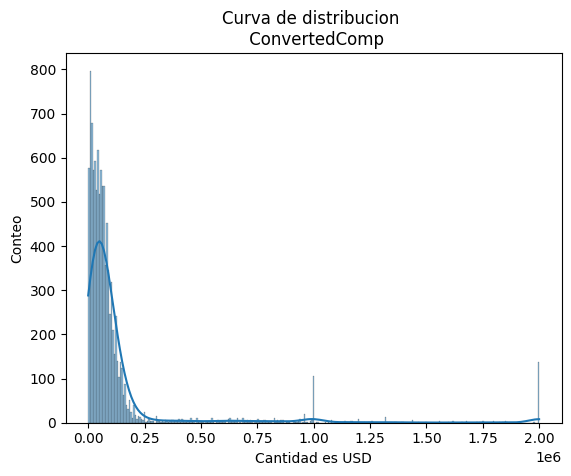

In [24]:
# Grafica la curva de distribucion  para la columna ConvertedComp.
sns.histplot(new_data["ConvertedComp"], kde = True)
plt.title("Curva de distribucion \n ConvertedComp")
plt.ylabel("Conteo")
plt.xlabel("Cantidad es USD")
plt.show()

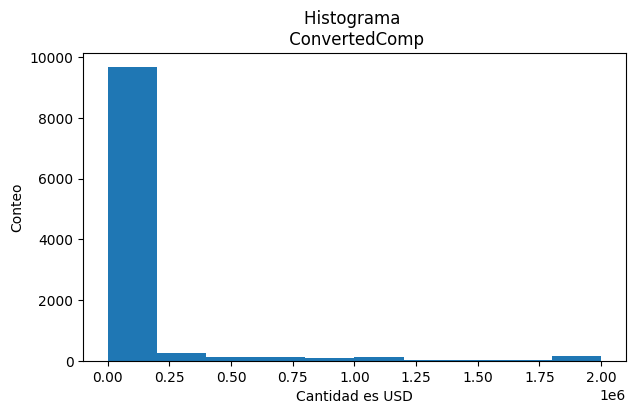

In [25]:
# Grafica el histograma para la columna ConvertedComp.
new_data['ConvertedComp'].plot(kind='hist', figsize=(7, 4))
plt.title("Histograma \n ConvertedComp")
plt.ylabel("Conteo")
plt.xlabel("Cantidad es USD")
plt.show()

In [26]:
# Cual en la mediana de la columna: ConvertedComp
print("La mediana es: ", new_data["ConvertedComp"].median())

La mediana es:  57745.0


In [27]:
# ¿Cuantos encuestados se identificaron unicamente como hombres?
new_data["Gender"].value_counts()

,count
Gender,
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


In [28]:
#mostrando solo los valores de hombres
man= (new_data["Gender"]=="Man").sum()
print("El total de hombres es: ", man)

El total de hombres es:  10480


In [29]:
#otra forma adicional de responder:
count_men = new_data[new_data["Gender"] == "Man"].shape[0]
print(f"El número de hombres es: {count_men}")

El número de hombres es: 10480


In [30]:
#mediana de age
mediana = (new_data['Age']).median()
mediana

29.0

In [31]:
# Averigüe el ConvertedComp medio de los encuestados que se identificaron solo como mujeres.
only_woman=new_data[new_data['Gender']=='Woman']
print("Mediana de mujeres es: ", only_woman['ConvertedComp'].median())

Mediana de mujeres es:  57708.0


In [32]:
# Proporcione el resumen estadistico de cinco números para la columna Edad.
new_data["Age"].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


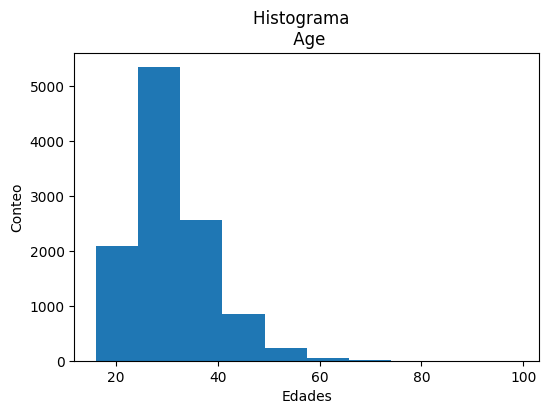

In [33]:
# grafica el histograma de la columna age
new_data['Age'].plot(kind='hist', figsize=(6, 4))
plt.title("Histograma  \n Age")
plt.ylabel("Conteo")
plt.xlabel("Edades")
plt.show()

<h3>Outliers</h3>
<p>Como encontrar valores atipicos</p>

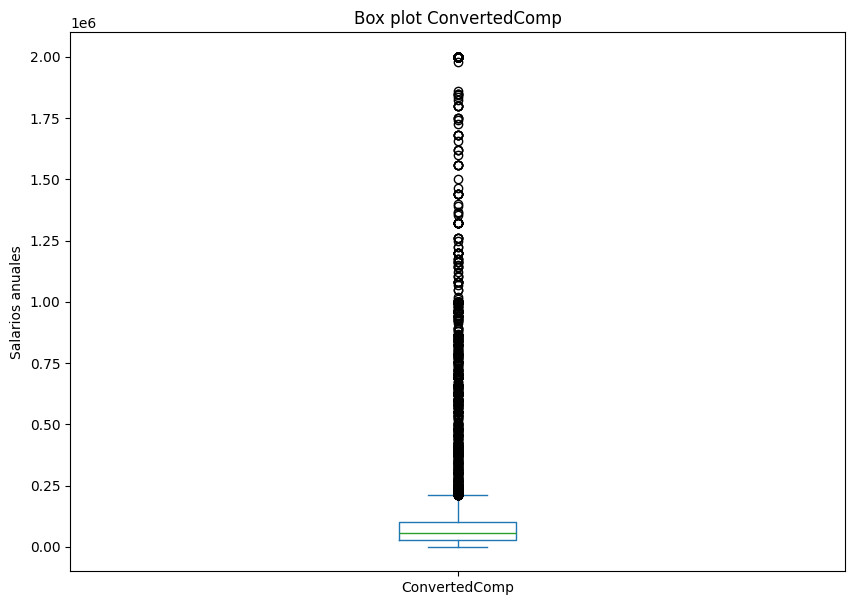

In [34]:
# Como averiguar si existen valores atípicos en la columna ConvertedComp usando un diagrama de caja
convertcomtend = new_data["ConvertedComp"]
convertcomtend.plot(kind='box', figsize=(10, 7))
plt.title('Box plot ConvertedComp')
plt.ylabel('Salarios anuales')
plt.show()

<b>Descubra el rango intercuartil para la columna ConvertedComp</b>
<p>Los cuartiles son cuatro y dividen un conjunto de datos ordenados en cuatro partes iguales. Cada cuartil representa el 25% del total de los datos.</p>
<ul>
<li> Primer cuartil (Q1): Es el valor que deja el 25% de los datos por debajo. También se llama el cuantil 25% o el percentil 25.</li>
<li>Segundo cuartil (Q2): Es el valor que deja el 50% de los datos por debajo.Es equivalente a la mediana del conjunto de datos. También se llama el cuantil 50% o el percentil 50.</li>
<li>Tercer cuartil (Q3): Es el valor que deja el 75% de los datos por debajo. También se llama el cuantil 75% o el percentil 75.</li>
<li>Cuarto cuartil: Aunque técnicamente se podría mencionar como el límite superior, los cuartiles suelen referirse a las divisiones, por lo que no hay un Q4 explícito en las mediciones comunes.</li>
<li>Rango intercualtil (IQR): Representa diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir, el rango en el que se encuentra el 50% central de los datos.
</ul>
<p>Descrubriendo el rango intercualtil</p>

In [35]:
# seleccionando la columna y tratando los datos
column_salary = new_data["ConvertedComp"].copy()#axis=0: Elimina las filas que contienen valores NaN
column_salary.dropna(axis=0, inplace=True)
column_salary.fillna(0, inplace=True)

In [36]:
#Formando los datos cuartiles y el rango intercuartil
q1 = column_salary.quantile(0.25)
q2 = column_salary.quantile(0.50)
q3 = column_salary.quantile(0.75)
iqr = q3-q1
print("El primer cuantil:", q1)
print("El segundo cuantil:", q2)
print("El tercer cuantil:", q3)
print("El rango intercuantil (q3- q1):", iqr)

El primer cuantil: 26868.0
El segundo cuantil: 57745.0
El tercer cuantil: 100000.0
El rango intercuantil (q3- q1): 73132.0


<b>Metodo para encontrar los outliers</b>
<p>Usando el rango intercuartílico (IQR): El rango intercuartílico es uno de los métodos más comunes para detectar outliers. El IQR mide la dispersión en el conjunto de datos y se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).</p>
<p>Fórmulas clave:</p>
<ul>
<li>IQR = Q3 - Q1</li>
<li>Límite inferior = Q1 - 1.5 * IQR</li>
<li>Límite superior = Q3 + 1.5 * IQR</li>
</ul>

<p>Cualquier valor que se encuentre por debajo del límite inferior o por encima del límite superior se considera un outlier.</p>

In [37]:
# Descubra los límites superior e inferior.
valor_minimo = q1-1.5*iqr
valor_maximo = q3+1.5*iqr
print("El valor minimo es: ", valor_minimo)
print("El valor maximo es: ", valor_maximo)

El valor minimo es:  -82830.0
El valor maximo es:  209698.0


In [38]:
#Identifique cuántos valores atípicos hay en la columna ConvertedComp.
outliers = column_salary[(column_salary < valor_minimo) | (column_salary > valor_maximo)]
print("El total de valores atipicos son:",outliers.count())
outliers_min = column_salary[column_salary < valor_minimo]
print("El total de valores atipicos minimos son:", outliers_min.count())
outliers_max = column_salary[(column_salary > valor_maximo)]
print("El total de valores atipicos maximos son:", outliers_max.count())

El total de valores atipicos son: 879
El total de valores atipicos minimos son: 0
El total de valores atipicos maximos son: 879


In [39]:
# Cree un nuevo dataframe eliminando los valores atipicos de la columna ConvertedComp
# El valor ~ invierte la serien boolena
data_clean = new_data[~new_data["ConvertedComp"].isin(outliers)]

In [40]:
# identificando la mediana
data_clean["ConvertedComp"].median()

52704.0

In [41]:
#identificando el promedio
data_clean["ConvertedComp"].mean()

59883.20838915799

In [42]:
data.shape

(11552, 85)

In [43]:
# Eliminando los valores faltantes, subset considera la columna
datos_clean = data_clean.dropna(subset=['NormalizedAnnualCompensation'])

In [44]:
#muestra el dataset limpio
datos_clean.shape

(9710, 86)

<h3>Correlación</h3>
<p>Encuentre la correlación entre la edad y todas las demás columnas numéricas</p>

In [45]:
#Seleccionando solo las variables numericas para la correlacion
df_numericas = datos_clean.select_dtypes(include=['float64', 'int64'])

In [46]:
# Identificando las variables numericas
df_numericas.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.019364,0.010878,-0.016235,0.004588,0.002636,0.001307
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371,0.703632
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821,-0.086286
WorkWeekHrs,-0.016235,0.004975,0.034351,1.000000,0.039503,0.032058,0.009935
CodeRevHrs,0.004588,0.017536,-0.088934,0.039503,1.000000,-0.012763,0.038952
Age,0.002636,0.006371,0.401821,0.032058,-0.012763,1.000000,-0.016317
NormalizedAnnualCompensation,0.001307,0.703632,-0.086286,0.009935,0.038952,-0.016317,1.000000


In [50]:
datos_clean.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [84]:
# agrupan
datos_agrupados = datos_clean.groupby("LanguageWorkedWith")[ "NormalizedAnnualCompensation"].mean().reset_index()

In [91]:
datos_agrupados

,LanguageWorkedWith,NormalizedAnnualCompensation
0,Assembly;Bash/Shell/PowerShell,656000.0
1,Assembly;Bash/Shell/PowerShell;C#;Dart;Go;Java...,15000.0
2,Assembly;Bash/Shell/PowerShell;C#;Elixir;JavaS...,70000.0
3,Assembly;Bash/Shell/PowerShell;C#;Erlang;HTML/...,30000.0
4,Assembly;Bash/Shell/PowerShell;C#;F#;Go;HTML/C...,50000.0
...,...,...
3959,Scala;SQL,155000.0
3960,Scala;TypeScript,60000.0
3961,Swift,1809468.0
3962,Swift;TypeScript,25000.0


In [118]:
# filtros
filtros_group =["C", "C#", "Java", "Scala", "C++","Python", "Go", "JavaScript","Bash/Shell/PowerShell","HTML/CSS", "Swift"]

In [119]:
final_data = datos_agrupados[datos_agrupados['LanguageWorkedWith'].isin(filtros_group)]
print(final_data)

         LanguageWorkedWith  NormalizedAnnualCompensation
340   Bash/Shell/PowerShell                  4.404000e+05
2145                      C                  8.400000e+05
2146                     C#                  1.244542e+07
2588                    C++                  2.988856e+05
3753                   Java                  6.597226e+06
3864             JavaScript                  6.064167e+05
3930                 Python                  1.717234e+07
3957                  Scala                  2.743889e+05
3961                  Swift                  1.809468e+06


In [120]:
#ordenando
final_data = final_data.sort_values(by="NormalizedAnnualCompensation")

In [121]:
#importando librerias
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# creando colores
paleta_colores = sns.color_palette("husl", len(final_data))

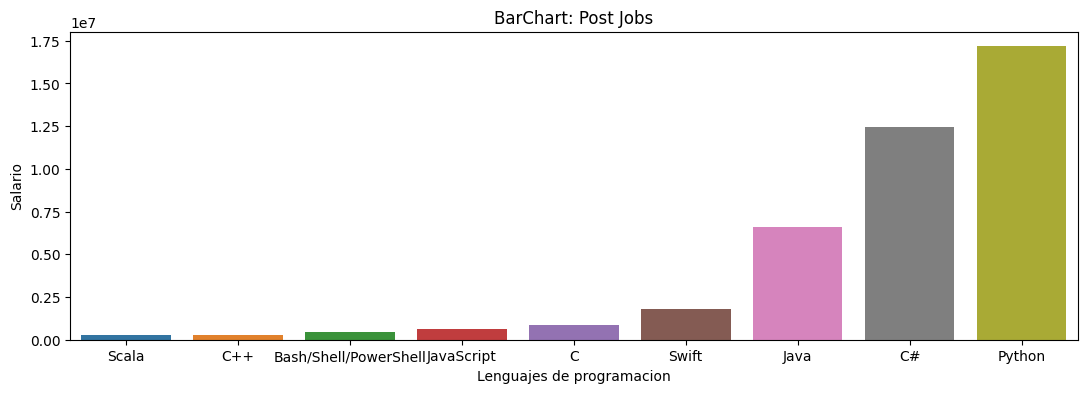

In [125]:
# graficando
plt.figure(figsize=(13,4))
sns.barplot(x='LanguageWorkedWith', y='NormalizedAnnualCompensation', data=final_data, hue="LanguageWorkedWith")
# Etiquetas y título (opcional)
plt.xlabel('Lenguajes de programacion')
plt.ylabel('Salario')
plt.title('BarChart: Post Jobs')
plt.show()